1. Reversing a string
2. triple indexing
3. Finding an element in string.

In [16]:
#Reversing a string
a = 'Bermigham'
print(f'1. {a[::-1]}')
print(f'2. {a[::-2]}')
print(f'3. {a[0:9:2]}')

1. mahgimreB
2. mhirB
3. Brihm


In [45]:
#Finding an element in string
s = '  $Hello my name is ALi$  '
print(f"1.    {s.find('name')}") #gives starting index
print(f"2.    {s.index('name')}")
print(f"3.    {s.find('name' , 4 , 16)}")

1.    12
2.    12
3.    12


In [46]:
#Length of string
print(f'1.   {len(s)}')
s.strip(' ')

1.   26


'$Hello my name is ALi$'

In [53]:
#stripping a string
print(f"1.   {s.count('e')}")
print(f"2.   {s.rstrip(' ')}") #right strip
c = '$Hello my name is ALi$'

print(f"3.   {c.strip('$')}")

1.   2
2.     $Hello my name is ALi$
3.   Hello my name is ALi


In [54]:
# Showing double quotes in string
sti = "He who's this"
print(sti)
'"hello" this is Ali'

He who's this


'"hello" this is Ali'

In [57]:
muli_line_str = \
'''
This is line 1
This is line 2
This is line 3
'''
muli_line_str

'\nThis is line 1\nThis is line 2\nThis is line 3\n'

In [1]:
a1 = ['My name is ALi' , 'My name is manan']
a2 = ['Im intrested in AI' , 'Im interwrted in medival']
a3 = ['I want to become researcher' , 'I want to become doc']
dic = {'col1':a1,
       'col2':a2,
       'col3':a3}
df=  pd.DataFrame(dic)
df

<IPython.core.display.Javascript object>

,col1,col2,col3
0,My name is ALi,Im intrested in AI,I want to become researcher
1,My name is manan,Im interwrted in medival,I want to become doc


In [3]:
i = 0
if i == 0:
    data = df.iloc[i,0:3]
data

col1                 My name is ALi
col2             Im intrested in AI
col3    I want to become researcher
Name: 0, dtype: object

In [4]:
' '.join(data)

'My name is ALi Im intrested in AI I want to become researcher'

In [5]:
l1 = []
for i in range(0,len(df)):
    data = df.iloc[i,0:3]
    l1.append(' '.join(data))
    
df['tot'] = l1 
df

,col1,col2,col3,tot
0,My name is ALi,Im intrested in AI,I want to become researcher,My name is ALi Im intrested in AI I want to be...
1,My name is manan,Im interwrted in medival,I want to become doc,My name is manan Im interwrted in medival I wa...


In [14]:
index = df['col1'].str.contains(r'.*manan')
df.loc[index,'col1']

1    My name is manan
Name: col1, dtype: object

In [1]:
pd.set_option('display.width',1000)
pd.set_option('max_colwidth', 1000) 
dic = {'Text': ["We Our deeds are the reasons for this #Earthquake caused May ALLAH #forgive us all",
               "Forest fire near La Ronge #Sask. canada100flemming putted sold?",
               "Now, this is a dummy #DataSet\ [just] for playing with #NLP!!",
               "are    playing or played$ We, I'm in1a -5 #meeting https"],
        'Class': [1,0,0,1]}
df = pd.DataFrame(dic)
df

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

,Text,Class
0,We Our deeds are the reasons for this #Earthquake caused May ALLAH #forgive us all,1
1,Forest fire near La Ronge #Sask. canada100flemming putted sold?,0
2,"Now, this is a dummy #DataSet\ [just] for playing with #NLP!!",0
3,"are playing or played$ We, I'm in1a -5 #meeting https",1


In [2]:
idx = df['Text'].str.match(r'.*We(,)')
df.loc[idx,:]

,Text,Class
3,"are playing or played$ We, I'm in1a -5 #meeting https",1


In [10]:
import re
hashtags = []
    # Loop over the words in the tweet
for i in df['Text']:
    ht = re.findall(r"#(\w+)", i)
    hashtags.append(ht)
hashtags

[['Earthquake', 'forgive'], ['Sask'], ['DataSet', 'NLP'], ['meeting']]

In [11]:
## Un-nesting lists
hashtags = sum(hashtags,[])
print(hashtags)


['Earthquake', 'forgive', 'Sask', 'DataSet', 'NLP', 'meeting']


In [13]:
import nltk
a = nltk.FreqDist(hashtags)
a

FreqDist({'Earthquake': 1, 'forgive': 1, 'Sask': 1, 'DataSet': 1, 'NLP': 1, 'meeting': 1})

In [17]:
b = pd.DataFrame({'tags': a.keys() , 'count':a.values()})
b

<IPython.core.display.Javascript object>

,tags,count
0,Earthquake,1
1,forgive,1
2,Sask,1
3,DataSet,1
4,NLP,1
5,meeting,1


In [20]:
c = b.nlargest(n = 3 , columns = 'count')
c

,tags,count
0,Earthquake,1
1,forgive,1
2,Sask,1


<IPython.core.display.Javascript object>

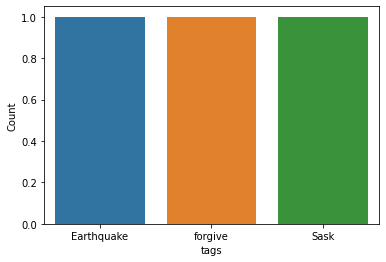

In [22]:
import seaborn as sns
ax = sns.barplot(data=c, x= "tags", y = "count")
ax.set_ylabel('Count')
ax.set_xlabel('tags')
plt.show()